# Logistic Regression

# Introduction

The Stroke Prediction Dataset we are working with is a dataset used for the task of predicting the likelihood of an individual having a stroke based on various health-related attributes. The dataset is typically used in the context of healthcare analytics and predictive modeling.

# Objective

The objective of working with the Stroke Prediction Dataset is to develop a predictive model that can accurately identify individuals at risk of experiencing a stroke based on their health and demographic attributes. This model aims to assist healthcare professionals in early risk assessment, enabling timely intervention and potentially improving patient outcomes.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")
df=data.copy()
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns') # fstring 

There are 5110 rows and 12 columns


In [16]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [19]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


<b>Observations:</b>

Some features, such as glucose, blood pressure, and BMI, have minimum values that seem unusually low (e.g., 0.08), suggesting potential data quality issues that need to be addressed through data preprocessing.

The presence of outliers in features like age, glucose level, and BMI is indicated by the difference between the maximum values and the 3rd quartile.

In [21]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<b>ID</b>

ID is nothing but a unique number assigned to every patient to keep track of them and making them unique. There is no need for ID. So we shall drop it. 

In [68]:
data.drop("id",inplace=True,axis=1)

# EDA

Here we will try to plot different graphs to better understand the dataset on different parameters.

<b>Gender:</b>

This attribute indicates the patient's gender. Let's explore how gender influences and compare the stroke rates based on gender.

In [30]:
print('Unique values\n',data['gender'].unique())
print('Value Counts\n',data['gender'].value_counts())

Unique values
 ['Male' 'Female' 'Other']
Value Counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

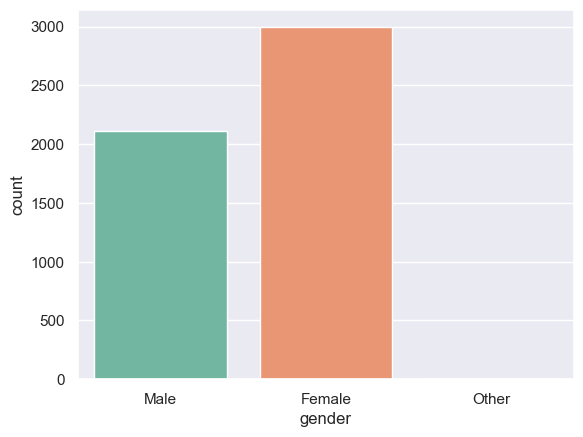

In [27]:
sns.countplot(data=df,x='gender')
# Helps to plot a count plot which will help us to see count of values in each unique category.

<Axes: xlabel='gender', ylabel='count'>

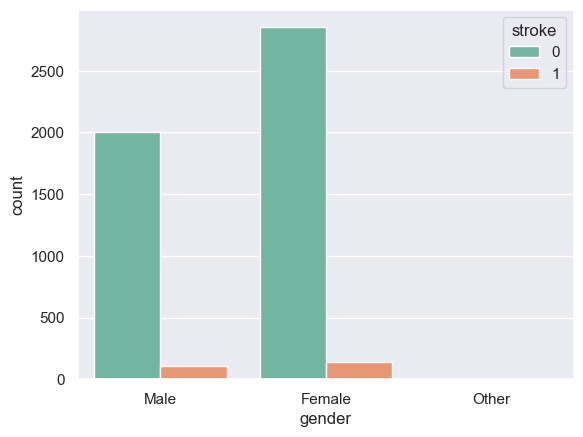

In [28]:
sns.countplot(data=df,x='gender',hue='stroke')
# This plot will help to analyze how gender will affect chances of stroke.

<b>Age</b>

Age is not just a numeric value; it holds substantial significance in our analysis. Let's delve into our data to assess its true impact.

In [33]:
data['age'].nunique()
# Returns number of unique values in this attribute

104

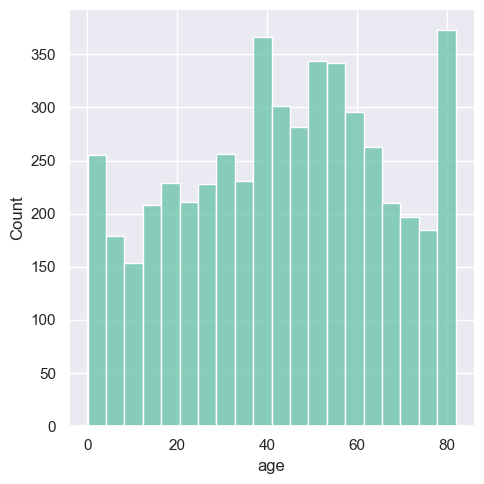

In [32]:
sns.displot(data['age'])
# This will plot a distribution plot of variable age

<Axes: xlabel='stroke', ylabel='age'>

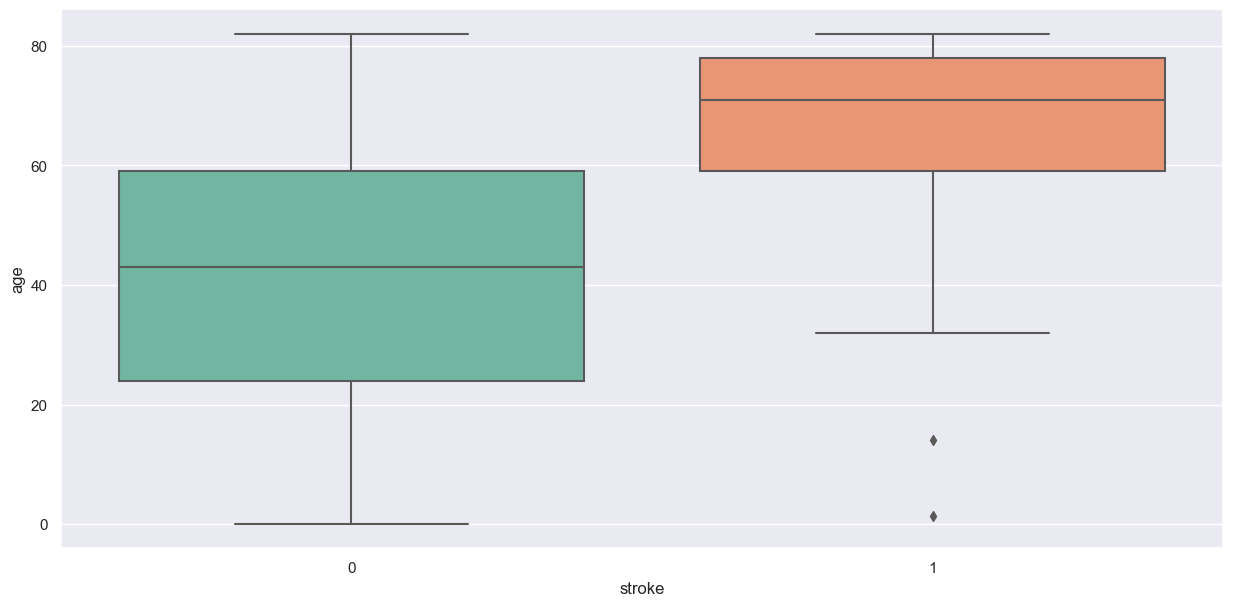

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='stroke',y='age')
# Above code will plot a boxplot of variable age with respect of target attribute stroke

<b>Hypertension:</b>

Hypertension, characterized by high blood pressure, can potentially lead to strokes. Let's examine the relationship between hypertension and its impact on stroke occurrences.

In [35]:
data['age'].nunique()
# Returns number of unique values in this attribute

104

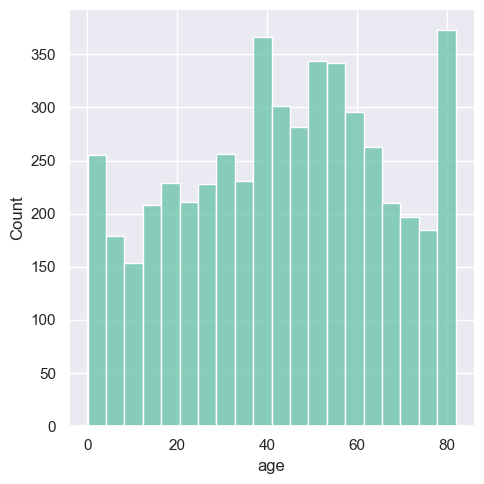

In [36]:
sns.displot(data['age'])
# This will plot a distribution plot of variable age

<Axes: xlabel='stroke', ylabel='age'>

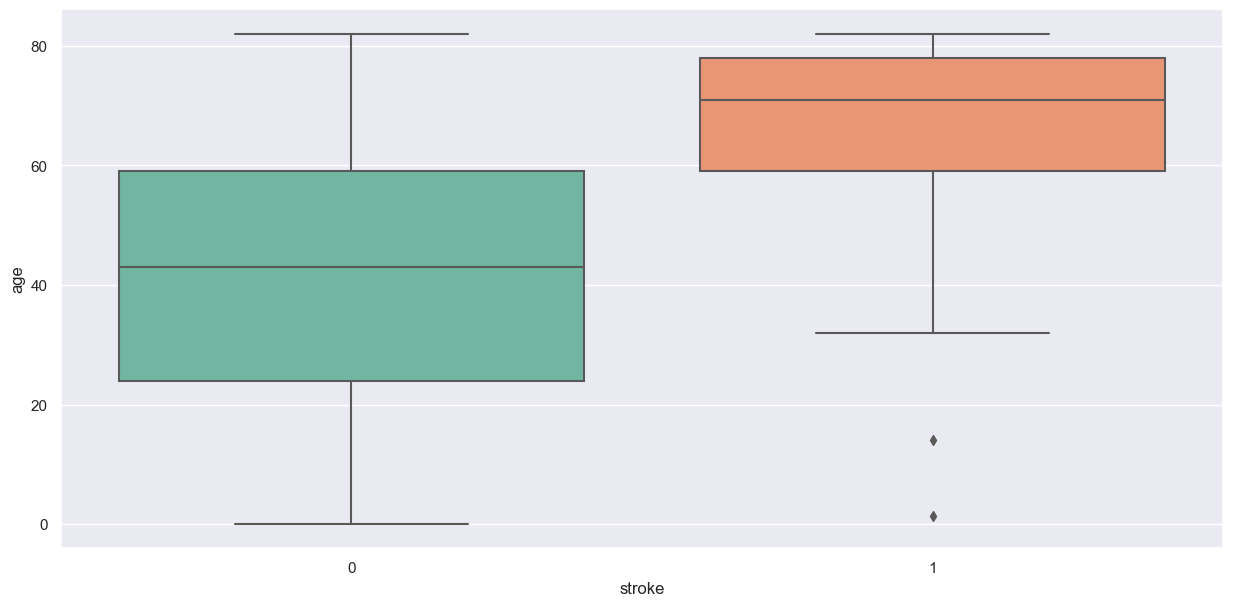

In [37]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='stroke',y='age')
# Above code will plot a boxplot of variable age with respect of target attribute stroke

<b>Heart Disease:</b>

Individuals with heart disease are at an elevated risk of experiencing a stroke if appropriate precautions and care are not observed.

In [38]:
print('Unique Value\n',data['heart_disease'].unique())
print('Value Counts\n',data['heart_disease'].value_counts())
# Above code will return unique value for heart disease attribute and its value counts

Unique Value
 [1 0]
Value Counts
 0    4834
1     276
Name: heart_disease, dtype: int64


<Axes: xlabel='heart_disease', ylabel='count'>

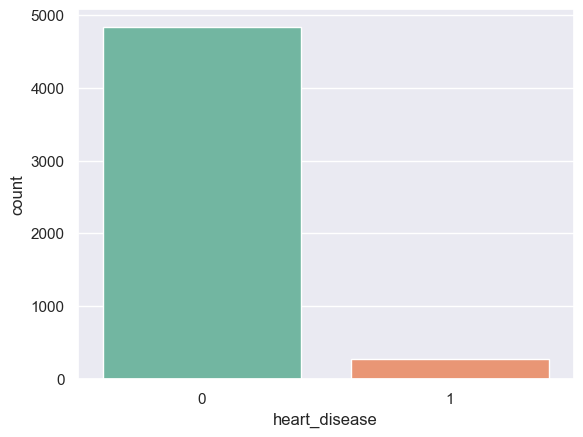

In [39]:
sns.countplot(data=data,x='heart_disease')
# Will plot a counter plot of variable heart diseases

<Axes: xlabel='heart_disease', ylabel='count'>

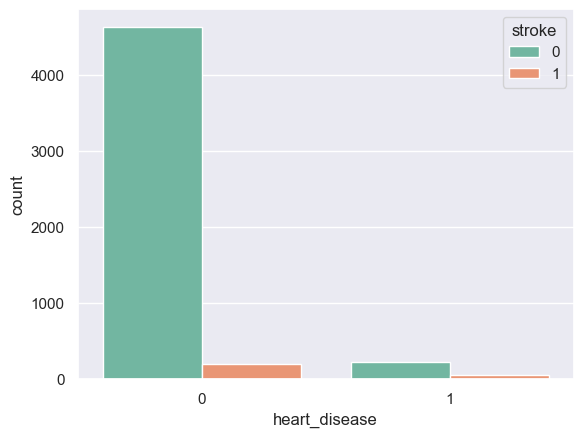

In [40]:
sns.countplot(data=df,x='heart_disease',hue='stroke')
# This plot will help to analyze how gender will affect chances of stroke.

<b>Ever Married:</b>

This attribute indicates the marital status of the patient. Let's investigate how it influences the likelihood of experiencing a stroke.

In [41]:
print('Unique Values\n',data['ever_married'].unique())
print('Value Counts\n',data['ever_married'].value_counts())
# Above code will show us number unique values of attribute and its count

Unique Values
 ['Yes' 'No']
Value Counts
 Yes    3353
No     1757
Name: ever_married, dtype: int64


<Axes: xlabel='ever_married', ylabel='count'>

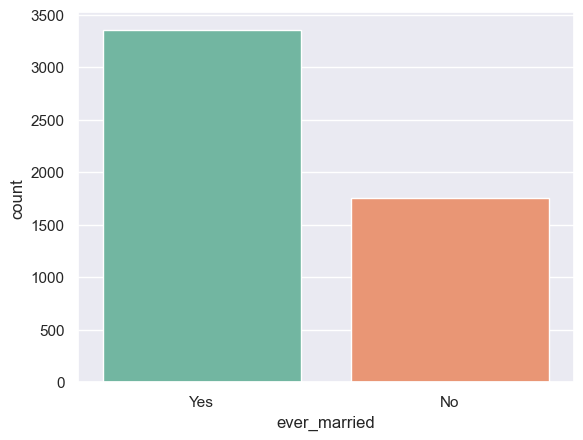

In [42]:
sns.countplot(data=data,x='ever_married')
# Counter plot of ever married attribute

<Axes: xlabel='ever_married', ylabel='count'>

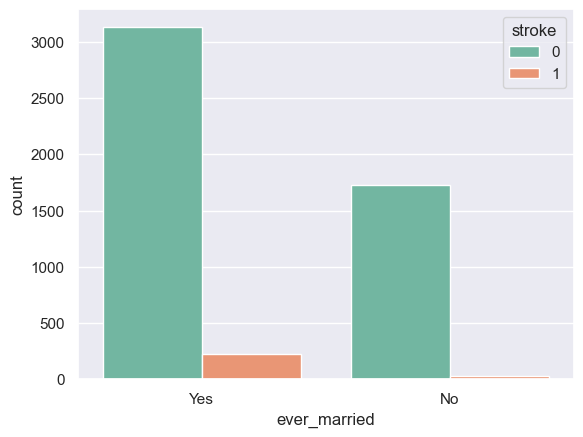

In [43]:
sns.countplot(data=data,x='ever_married',hue='stroke')
# Ever married with respect of stroke

<b>Work Type:</b>

This attribute provides information about the patient's occupation, which may involve varying degrees of stress, excitement, challenges, and other factors. Let's explore how this variable can impact the likelihood of experiencing a stroke, considering the potential influence of occupational factors on health.

In [44]:
print('Unique Value\n',data['work_type'].unique())
print('Value Counts\n',data['work_type'].value_counts())
# Above code will return unique values of attributes and its count

Unique Value
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


<Axes: xlabel='work_type', ylabel='count'>

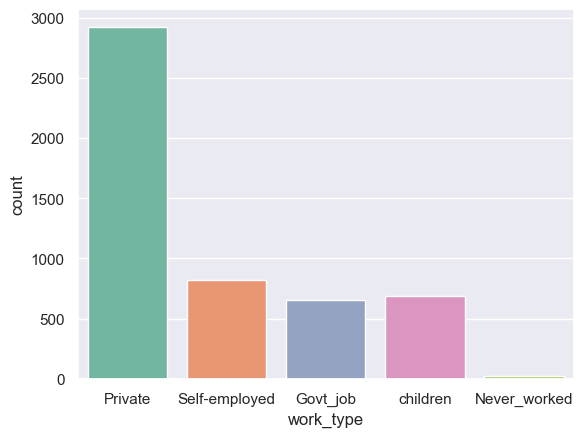

In [45]:
sns.countplot(data=data,x='work_type')
# Above code will create a count plot

<Axes: xlabel='work_type', ylabel='count'>

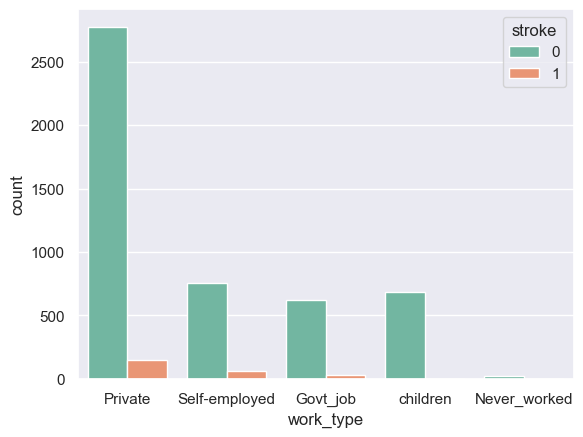

In [46]:
sns.countplot(data=data,x='work_type',hue='stroke')
# Above code will create a count plot with respect to stroke

<b>Residence Type:</b>

This attribute informs us about the type of residence where the patient lives, which can be categorized as either urban or rural.

In [47]:
print('Unique Values\n',data['Residence_type'].unique())
print("Value Counts\n",data['Residence_type'].value_counts())
# Above code will return unique values of variable and its count

Unique Values
 ['Urban' 'Rural']
Value Counts
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


<Axes: xlabel='Residence_type', ylabel='count'>

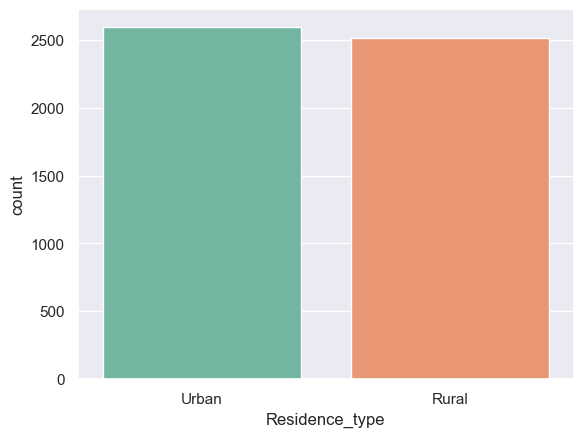

In [48]:
sns.countplot(data=data,x='Residence_type')
# This will create a counter plot

<Axes: xlabel='Residence_type', ylabel='count'>

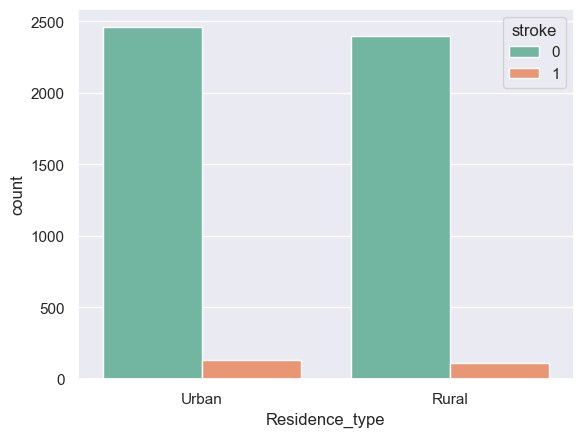

In [49]:
sns.countplot(data=data,x='Residence_type',hue='stroke')
# Residence Type with respect to stroke

<b>Average Glucose Level:</b>

This attribute provides information about the patient's average glucose level, and we aim to investigate its potential impact on the likelihood of experiencing a stroke.

In [50]:
data['avg_glucose_level'].nunique()
# Number of unique values

3979

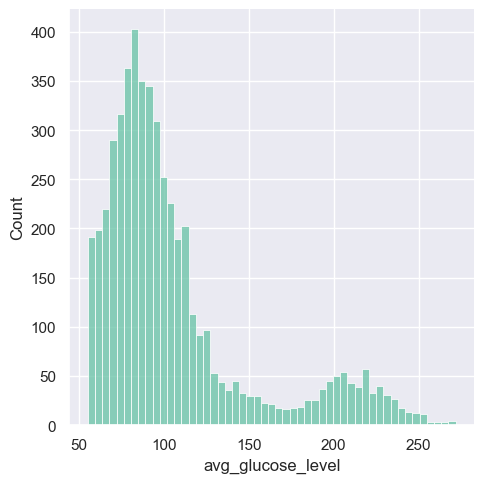

In [51]:
sns.displot(data['avg_glucose_level'])
# Distribution of avg_glucose_level

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

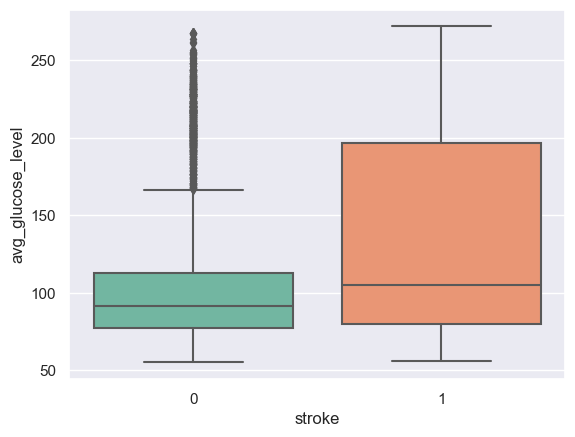

In [52]:
sns.boxplot(data=data,x='stroke',y='avg_glucose_level')
# Avg_glucose_level and Stroke

<b>BMI:</b>

The Body Mass Index (BMI) is a measure of body fat based on height and weight, applicable to adult individuals. We aim to explore its influence on the probability of experiencing a stroke.

In [55]:
data['bmi'].isna().sum()
# Returns number null values
data['bmi'].fillna(data['bmi'].mean(),inplace=True)
# Filling null values with average value
data['bmi'].nunique()
# Returns number of unique values in that attribute

419

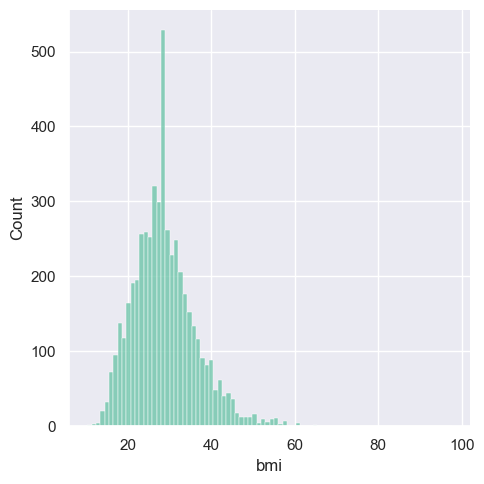

In [56]:
sns.displot(data['bmi'])
# Distribution of bmi

<Axes: xlabel='stroke', ylabel='bmi'>

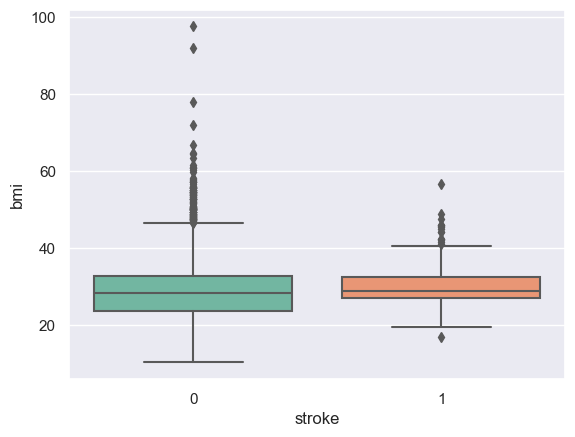

In [57]:
sns.boxplot(data=data,x='stroke',y='bmi')
# BMI with respect to Stroke

<b>Smoking Status:</b>

These attributes provide information on whether the patient smokes, a known health risk factor associated with cardiovascular diseases. Let's investigate its impact within the context of our dataset.

In [58]:
print('Unique Values\n',data['smoking_status'].unique())
print('Value Counts\n',data['smoking_status'].value_counts())
# Returns unique values and its count

Unique Values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


<Axes: xlabel='smoking_status', ylabel='count'>

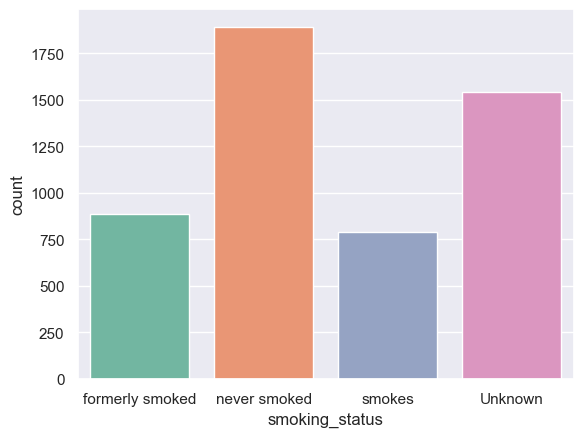

In [59]:
sns.countplot(data=data,x='smoking_status')
# Count plot of smoking status

<Axes: xlabel='smoking_status', ylabel='count'>

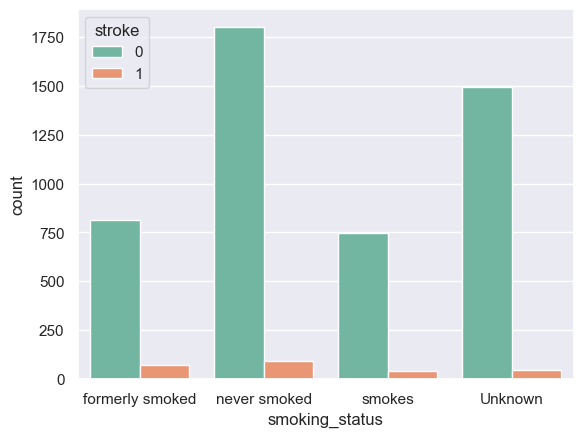

In [60]:
sns.countplot(data=data,x='smoking_status',hue='stroke')
# Smoking Status with respect to Stroke

<b>Stroke:</b>

Our target variable. It tells us whether patients have chances of stroke.

In [61]:
print('Unique Value\n',data['stroke'].unique())
print('Value Counts\n',data['stroke'].value_counts())
# Returns Unique Value and its count

Unique Value
 [1 0]
Value Counts
 0    4861
1     249
Name: stroke, dtype: int64


<Axes: xlabel='stroke', ylabel='count'>

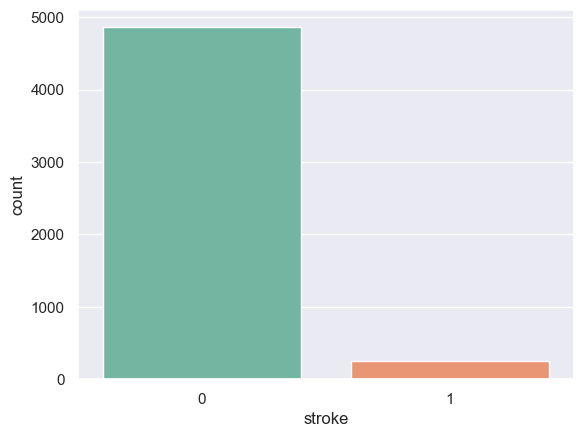

In [62]:
sns.countplot(data=data,x='stroke')
# Count Plot of Stroke

<b>Observations:</b>

<i>Gender:</i>
The dataset appears to be imbalanced with respect to gender, but there isn't a significant difference in stroke rates between genders.

<i>Age:</i>
Individuals aged over 60 are more prone to strokes, with some outliers below 20 years old. This suggests that age may not be the sole factor, as stroke risk also depends on lifestyle and eating habits.

<i>Hypertension:</i>
Hypertension is more common in older individuals and is a known risk factor for strokes. However, the data on patients with hypertension is limited in our dataset, making it challenging to draw clear conclusions.

<i>Heart Disease:</i>
Due to the imbalanced dataset, it's difficult to ascertain the impact of heart disease on strokes. However, the plot suggests that heart disease may not be a strong predictor.

<i>Marital Status:</i>
Married individuals exhibit a higher stroke rate compared to other marital statuses.

<i>Work Type:</i>
Employees in the private sector have a higher risk of strokes, while those who have never worked have a lower stroke rate.

<i>Residence Type:</i>
The "Residence Type" attribute appears to have little influence, as there is minimal difference between urban and rural residents. It may be considered for removal.

<i>Average Glucose Level:</i>
Patients who have had strokes tend to have an average glucose level exceeding 100. Outliers exist among non-stroke patients, but some of these records may be genuine.

<i>BMI:</i>
There is no prominent observation regarding the effect of BMI on stroke risk in the dataset.

<i>Smoking Status:</i>
The chances of having a stroke do not significantly differ based on smoking status, as indicated by the plots.

These observations provide insights into the dataset's attributes and their potential relationships with stroke occurrences.

# Feature Engineering

<b>Label Encoding:</b>

Our dataset consists of a combination of categorical and numeric data. To make it compatible with machine learning algorithms, we will utilize a technique called Label Encoder. Label Encoder transforms categorical data into numeric values by assigning them ascending numerical labels from 0 to n-1. This conversion allows us to work seamlessly with the data in a numeric format.

In [99]:
cols=data.select_dtypes(include=['object']).columns
# This code will fetech columns whose data type is object.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Initializing our Label Encoder object
data[cols]=data[cols].apply(le.fit_transform)
# Transfering categorical data into numeric
print(data.head(10))

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   
5       1  81.0             0              0             1          2   
6       1  74.0             1              1             1          2   
7       0  69.0             0              0             0          2   
8       0  59.0             0              0             1          2   
9       0  78.0             0              0             1          2   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237 

<b>Correlation</b>

<Axes: >

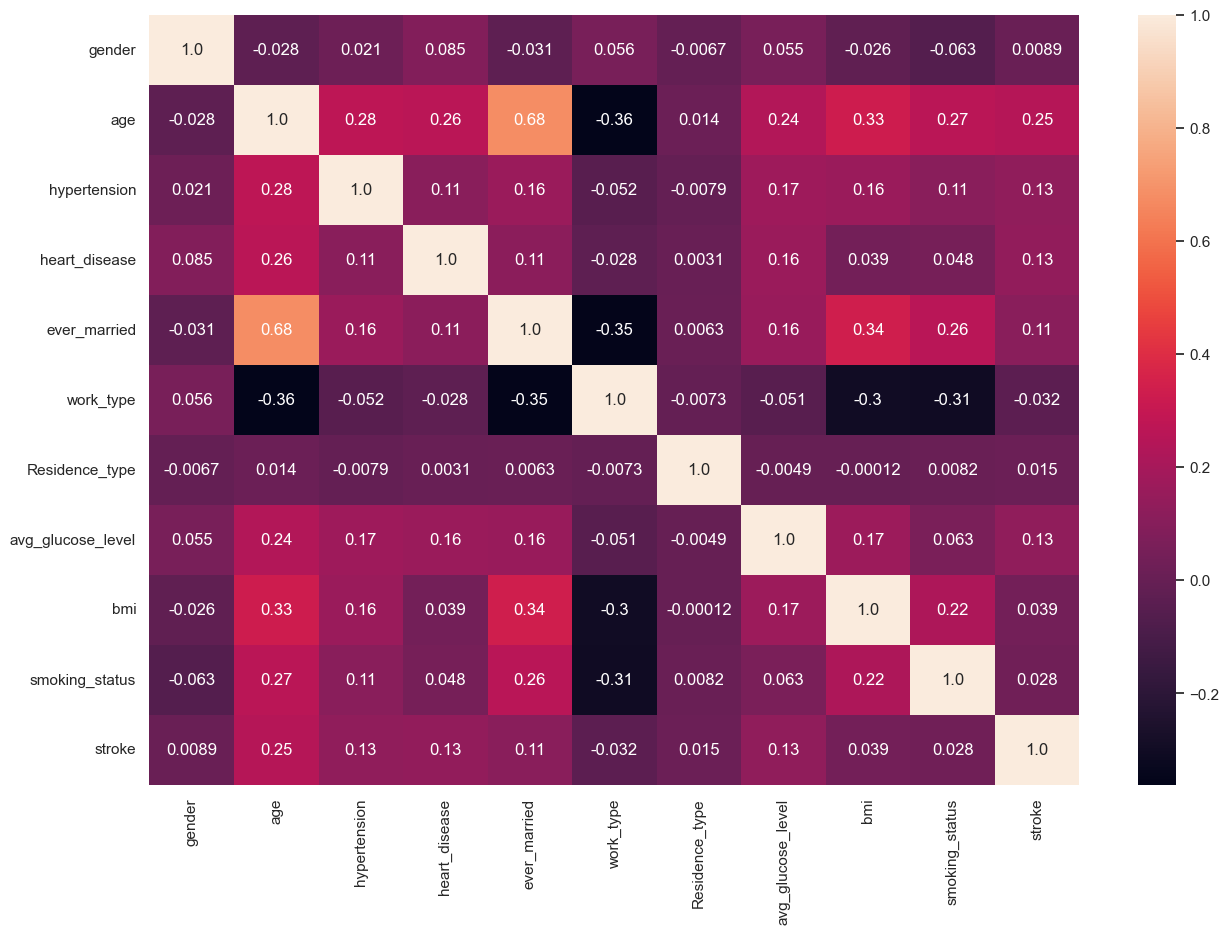

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')

Variables that are showing some effective correlation are:
age, hypertension, heart_disease, ever_married, avg_glucose_level

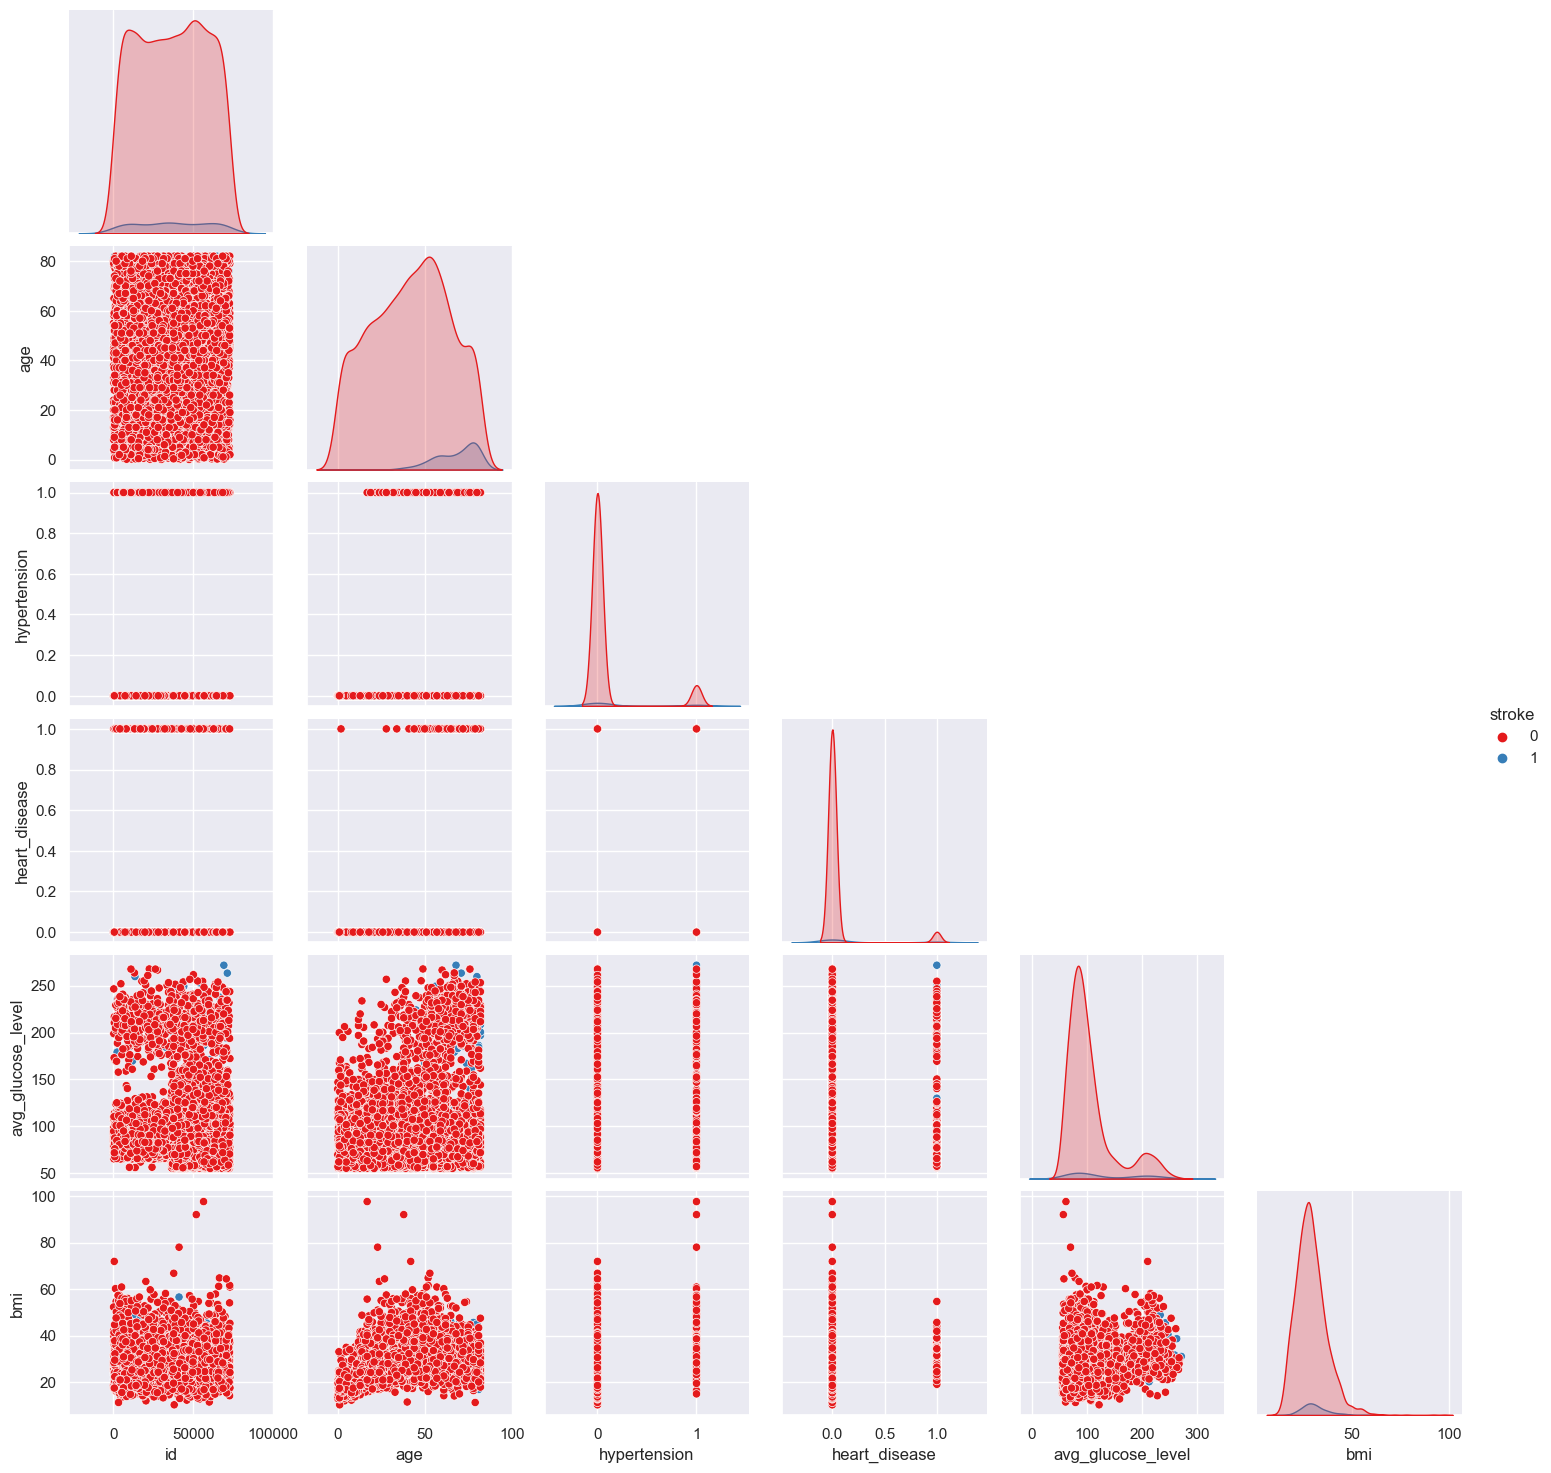

In [67]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(data=df,hue="stroke", corner=True)
plt.show()

# Splitting data

Now, let's partition the features into training and testing sets to facilitate the training and evaluation of our classification models.

In [102]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(data[['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level']],data['stroke'],random_state=1092,test_size=0.25)
#Splitting data
train_x.shape,test_x.shape,train_y.shape,test_y.shape
# Shape of data

((3832, 5), (1278, 5), (3832,), (1278,))

# Balancing Dataset

Given the imbalance in our dataset, we will employ the SMOTE method to address this issue. SMOTE helps balance the data by generating synthetic records that resemble the minority class. While typically applied to the entire dataset, in our case, due to the limited number of minority class records, we are applying SMOTE to both the training and testing data. This approach was chosen as it yielded improved results compared to solely resampling the training data.

In [104]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
train_x,train_y=smote.fit_resample(train_x,train_y)
test_x,test_y=smote.fit_resample(test_x,test_y)
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(7290, 5) (7290,) (2432, 5) (2432,)


# Model Creation

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [111]:
model = LogisticRegression()

# Train the model on the training data
model.fit(train_x, train_y)

# Make predictions on the test data
pred_y = model.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
classification_rep = classification_report(test_y, pred_y)
print("Classification Report:\n", classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(test_y, pred_y)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77      1216
           1       0.76      0.79      0.77      1216

    accuracy                           0.77      2432
   macro avg       0.77      0.77      0.77      2432
weighted avg       0.77      0.77      0.77      2432

Confusion Matrix:
 [[915 301]
 [260 956]]


<i>Accuracy:</i>
Accuracy measures the proportion of correctly predicted instances out of the total instances.
Our model achieved an accuracy of 0.77, indicating that it correctly predicted 77% of the cases in the dataset.

<i>Precision:</i>
Precision measures the accuracy of positive predictions. It is the ratio of true positive predictions to the total positive predictions.
For class 0, precision is 0.78, indicating that when the model predicts a stroke will not occur, it is correct 78% of the time.
For class 1, precision is 0.76, meaning that when the model predicts a stroke will occur, it is accurate 76% of the time.

<i>Recall:</i>
Recall, also known as sensitivity or true positive rate, measures the ability of the model to identify all positive instances.
For class 0, recall is 0.75, indicating that the model correctly identified 75% of the actual non-stroke cases.
For class 1, recall is 0.79, meaning that the model correctly identified 79% of the actual stroke cases.

<i>F1-Score:</i>
The F1-score is the harmonic mean of precision and recall, providing a balanced measure that considers both false positives and false negatives.
The F1-score is 0.77 for both classes, suggesting a reasonable balance between precision and recall.

<i>Critical Analysis:</i>
The model's accuracy of 0.77 indicates that it is performing reasonably well, correctly classifying a significant portion of the cases.
Precision and recall values are balanced for both classes, with only slight differences. This suggests that the model has a similar ability to correctly identify both stroke and non-stroke cases.
The F1-score of 0.77 is also balanced and indicates that the model is capable of achieving a good balance between precision and recall.
However, it's essential to consider the specific goals and costs associated with false positives and false negatives. Depending on the application, these trade-offs may vary.